Walmart Stock Data

In [185]:
import pandas as pd

# Data from github, download then read
wallmt=pd.read_csv('wmt_data.xls')

wallmt.head()

,date,open,high,low,close,adj_close,volume
0,2000-01-03 00:00:00-05:00,22.791668,23.000000,21.833332,22.270832,14.307388,25109700
1,2000-01-04 00:00:00-05:00,21.833332,21.937500,21.395832,21.437500,13.772032,20235300
2,2000-01-05 00:00:00-05:00,21.291668,21.458332,20.729168,21.000000,13.490974,21056100
3,2000-01-06 00:00:00-05:00,21.000000,21.520832,20.895832,21.229168,13.638196,19633500
4,2000-01-07 00:00:00-05:00,21.500000,22.979168,21.500000,22.833332,14.668746,23930700


In [186]:
date = pd.to_datetime(wallmt['date'], utc=True, errors='coerce')

wallmt = wallmt.sort_values(by='date').reset_index(drop=True)


In [187]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt 
plt.style.use("seaborn-v0_8-poster")

In [188]:
x = (date - date.min()).dt.days.values
y = wallmt['close'].values

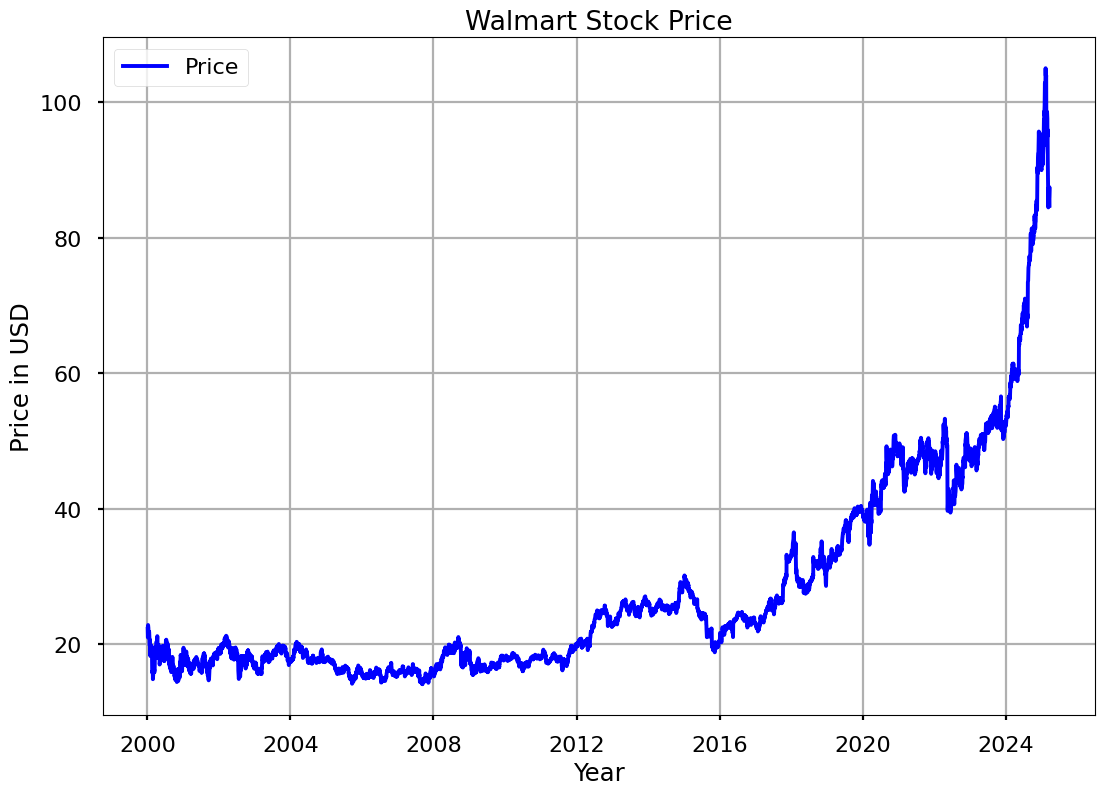

In [189]:
# Let’s have a look of the data
# Let’s have a look of the data
plt.plot(date, y, "b-", label="Price")
plt.title("Walmart Stock Price")
plt.xlabel("Year")
plt.ylabel("Price in USD")
plt.legend()
plt.grid()
plt.show()

In [190]:
A = np.vstack([x, np.ones(len(x))]).T
beta, log_alpha = np.linalg.lstsq(A, np.log(y), rcond=None)[0]
alpha = np.exp(log_alpha)
print(f"alpha={alpha}, beta={beta}")

alpha=12.586369945153418, beta=0.00014751109941089222


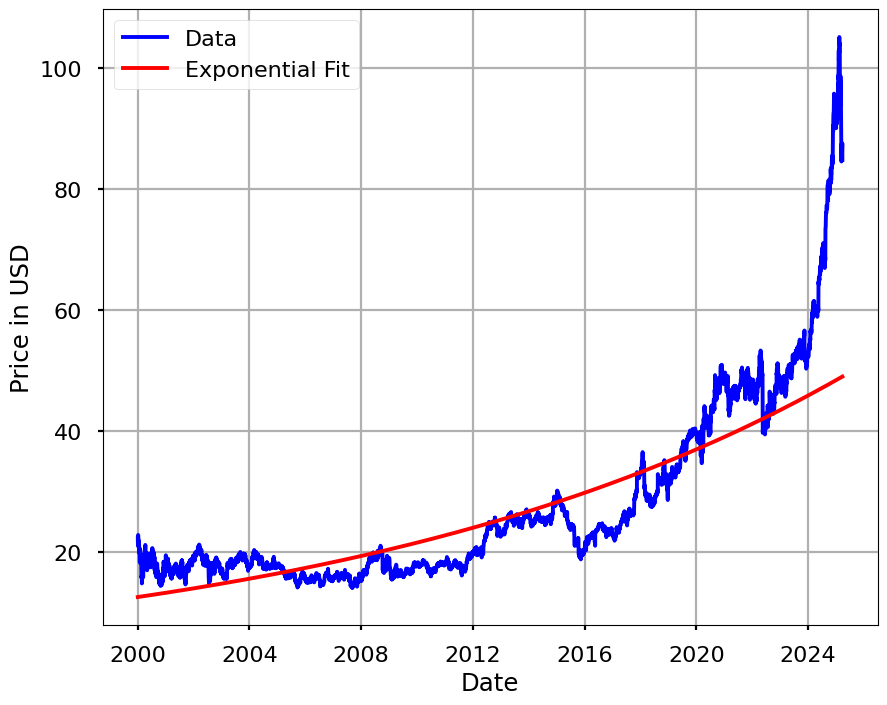

In [191]:
# Let’s have a look of the data plt.figure(figsize = (10,8))
plt.figure(figsize=(10,8))
plt.plot(date, y, "b-", label="Data")
plt.plot(date, alpha*np.exp(beta*x), "r", label="Exponential Fit")
plt.xlabel("Date"); plt.ylabel("Price in USD")
plt.legend(); plt.grid()
plt.show()

For the Walmart dataset, I applied an exponential fit y=αeβxy. The curve shows a general upward trend with long term growth in Walmart’s stock price. The model smooths short term changes caused by market. The exponential fit is useful for gathering overall growth but it is not precise for predicting short term changes. The exponential fit is a reasonable approximation of the dataset long term.

Video Games Sale

In [192]:
vg = pd.read_csv("video games sales.csv")

print(vg.head())

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


In [193]:
vg = vg.dropna(subset=["Year", "Global_Sales"])
vg = vg.sort_values(by="Year").reset_index(drop=True)

In [194]:
# x (numeric years) and y (global sales)
vg_clean = vg[vg["Global_Sales"] < 5].copy()

x = vg_clean["Year"].values - vg_clean["Year"].min()
y = vg_clean["Global_Sales"].values

In [195]:
# Linear fit
A_lin = np.vstack([x, np.ones(len(x))]).T
alpha_lin = np.linalg.lstsq(A_lin, y, rcond=None)[0]

# Quadratic fit
A_quad = np.vstack([x**2, x, np.ones(len(x))]).T
alpha_quad = np.linalg.lstsq(A_quad, y, rcond=None)[0]


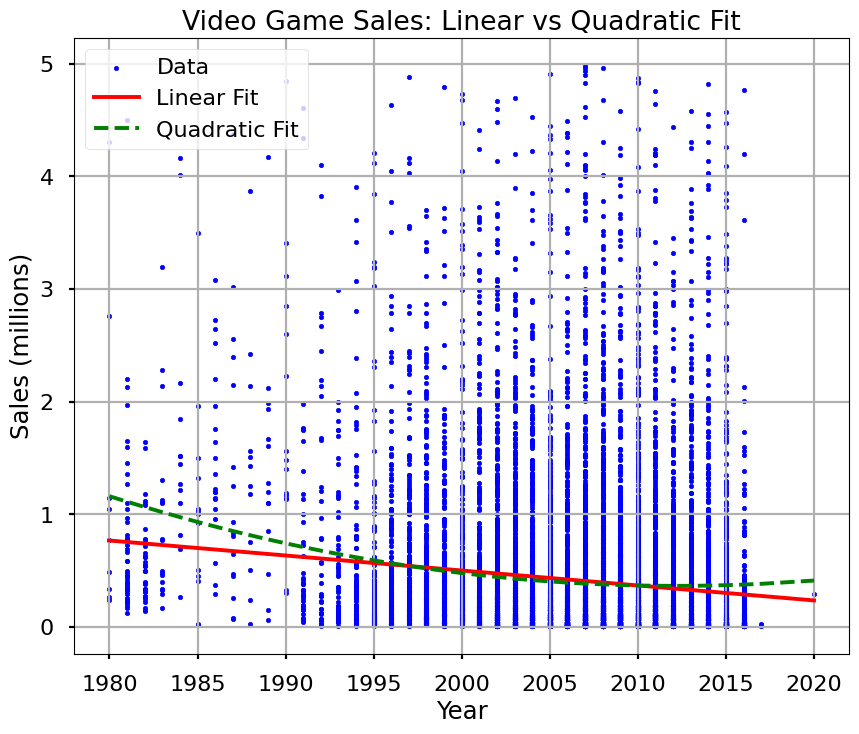

In [196]:
# Plot data and fits
plt.figure(figsize=(10,8))
plt.scatter(vg_clean["Year"], y, color="blue", s=10, label="Data")

plt.plot(vg_clean["Year"], alpha_lin[0]*x + alpha_lin[1], "r-", label="Linear Fit")

plt.plot(vg_clean["Year"], alpha_quad[0]*x**2 + alpha_quad[1]*x + alpha_quad[2], "g--", label="Quadratic Fit")

plt.xlabel("Year"); plt.ylabel("Sales (millions)")
plt.title("Video Game Sales: Linear vs Quadratic Fit")
plt.legend()
plt.grid()
plt.show()

In the video games dataset, I did both a linear and a quadratic regression. This was done using the year vs. the global sales. The linear fit suggests a steady downward trend, but it fails to capture the rise and fall of sales. The quadratic fit bends and can better reflecting the fluxuations in sales. This shows that video game sales are not purely linear as they can be influenced by new releases and new consoles.